In [1]:
cd ..

/home/zceehya/Documents/Fourth-Year-Project/NetworkSim


In [2]:
from NetworkSim.simulation.setup.simulator import Simulator
from NetworkSim.architecture.setup.model import Model
from NetworkSim.architecture.base.network import Network

In [3]:
model = Model(network=Network(num_nodes=100))
model.constants = {
    'speed': 2e8,  # speed of light in fibre, in m/s
    'maximum_bit_rate': 100,  # system burst rate (maximum bit rate), in Gbit/s
    'average_bit_rate': 10,  # system average bit rate, in Gbit/s
    'data_guard_interval': 20,  # guard interval of data packets in ns
    'control_guard_interval': 0.14,  # guard interval of control packets in ns
    'tuning_time': 20  # tuning time of the receiver in ns
}
simulator = Simulator(model=model, until=100000)

In [4]:
simulator.initialise()

In [5]:
simulator.run()

In [6]:
simulator.model.control_ring.packet_record_df

,Generation Timestamp,Transmission Timestamp,Reception Timestamp,Raw Packet,Source Node,Destination Node,Status,Total Packet Count
0,128.886344,150.0,NaN,0000111110001100,7,99,added,1
1,125.517917,150.0,NaN,0010101001111100,21,31,added,2
2,148.100298,150.0,NaN,0010110001101000,22,26,added,3
3,143.508410,150.0,NaN,0001011010000000,11,32,added,4
4,131.033203,150.0,NaN,0110111001001000,55,18,added,5
...,...,...,...,...,...,...,...,...
29645,97887.798649,99900.0,99978.0,0001000001010100,8,21,removed,34
29646,99150.377861,99750.0,99984.0,1010110001100100,86,25,removed,33
29647,99480.039270,99600.0,99984.0,0000010100001000,2,66,removed,32
29648,98077.494544,99600.0,99996.0,1011000011011000,88,54,removed,31


In [7]:
simulator.model.data_rings[0].packet_record_df

,Generation Timestamp,Transmission Timestamp,Reception Timestamp,Raw Packet,Source Node,Destination Node,Status,Total Packet Count
0,245.618323,300.0,NaN,0101111001000001010100111110110110110111100000...,0,83,added,1
1,434.371756,600.0,NaN,1010000001000111011111010111101100110011110101...,0,99,added,2
2,245.618323,300.0,798.0,0101111001000001010100111110110110110111100000...,0,83,removed,1
3,694.964052,900.0,NaN,1101111010000010000111111010100101000001001110...,0,66,added,2
4,434.371756,600.0,1194.0,1010000001000111011111010111101100110011110101...,0,99,removed,1
...,...,...,...,...,...,...,...,...
363,97911.997340,97950.0,99084.0,0100100011100110110010001000111011011010101001...,0,89,removed,2
364,98206.466876,98550.0,99126.0,1100111101010011010011011100011110010001001111...,0,96,removed,1
365,98618.489656,99150.0,NaN,1110110110101001110101100010001110100000010000...,0,96,added,2
366,99245.182514,99300.0,NaN,0100001000011101000011000000101111110000110100...,0,46,added,3


In [8]:
simulator.receiver[1].received_control_packet_df

,Timestamp,Raw Packet,Source ID
0,474.0,0101111000000100,47
1,510.0,1000010000000100,66
2,1812.0,0110001000000100,49
3,3168.0,1100010000000100,98
4,4032.0,0011101000000100,29
...,...,...,...
144,93936.0,1011111000000100,95
145,95160.0,0101001000000100,41
146,96546.0,0100011000000100,35
147,97986.0,0010100000000100,20


In [9]:
simulator.receiver[1].received_data_packet_df

,Timestamp,Raw Packet,Source ID
0,474,1010100100100101010110110000111011111111110010...,47
1,1110,0000100111100111100101101100111000010100011111...,66
2,1812,1010111101001000010011111100000010111100101111...,49
3,3168,1001010100000001011101100101111001100100100000...,98
4,4032,0111001011001100101000000011000000001011101001...,29
...,...,...,...
144,93936,1111010000100001110001010111001101110011111010...,95
145,95160,1001011010111010011110011100111110000000111010...,41
146,96546,1100010101010100000101011011101011101110101110...,35
147,97986,1111100100111001100101100110100010111110111001...,20


In [10]:
simulator.receiver[1].queue_df

,Timestamp,Raw Packet,Source ID,Operation
0,474.0,0101111000000100,47,Added
1,474.0,0101111000000100,47,Processed
2,510.0,1000010000000100,66,Added
3,614.0,1000010000000100,66,Processed
4,1812.0,0110001000000100,49,Added
...,...,...,...,...
293,96546.0,0100011000000100,35,Processed
294,97986.0,0010100000000100,20,Added
295,97986.0,0010100000000100,20,Processed
296,99804.0,0101010000000100,42,Added


In [11]:
simulator.model.get_data_packet_duration()

120.0

In [12]:
simulator.latency_df

,Source ID,Destination ID,Latency
0,22.0,26.0,165.899702
1,71.0,75.0,169.650464
2,84.0,90.0,200.799949
3,9.0,16.0,210.868437
4,21.0,31.0,224.482083
...,...,...,...
14744,20.0,8.0,1623.722943
14745,40.0,28.0,1397.180329
14746,11.0,84.0,2671.403742
14747,46.0,86.0,1486.203203


<AxesSubplot:>

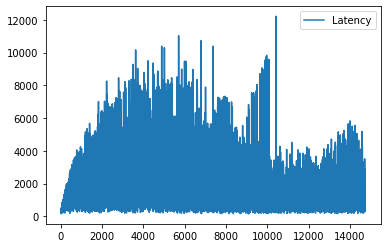

In [13]:
simulator.latency_df.plot(y='Latency')

In [14]:
simulator.latency_df["Latency"].mean()

1883.2187251837981

In [15]:
simulator.latency_df["Latency"].var()

2090242.3527121004

<AxesSubplot:>

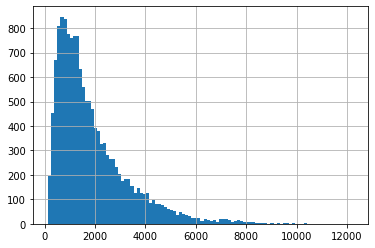

In [16]:
simulator.latency_df["Latency"].hist(bins=100)

In [17]:
simulator.latency_df["Latency"].min()

147.00727865230147

In [18]:
simulator.latency_df["Latency"].max()

12222.824026850518

In [19]:
simulator.transmitter[0].ram.generated_data_packet_df

,Timestamp,Interarrival to Next,Raw Packet,Destination ID
0,245.618323,188.753432,0101111001000001010100111110110110110111100000...,83
1,434.371756,260.592296,1010000001000111011111010111101100110011110101...,99
2,694.964052,578.216597,1101111010000010000111111010100101000001001110...,66
3,1273.180650,476.914115,1000101110110001110011000011001101000101001101...,41
4,1750.094764,189.448456,1010000001111010110101111000101001100110011111...,83
...,...,...,...,...
180,98040.554025,165.912851,0011110101011000101011101001000011001000100100...,63
181,98206.466876,225.030352,1100111101010011010011011100011110010001001111...,96
182,98431.497227,186.992429,0100101100100110011101010000001011100100100111...,69
183,98618.489656,626.692858,1110110110101001110101100010001110100000010000...,96
